In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers=pd.read_csv('/content/customers.csv')
geolocation=pd.read_csv('/content/geolocation.csv')
order_items=pd.read_csv('/content/order_items.csv')
orders=pd.read_csv('/content/orders.csv')
payments=pd.read_csv('/content/payments.csv')
products=pd.read_csv('/content/products.csv')


In [3]:
customers.info()
geolocation.info()
order_items.info()
orders.info()
payments.info()
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562540 entries, 0 to 562539
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  562540 non-null  int64  
 1   geolocation_lat              562540 non-null  float64
 2   geolocation_lng              562540 non-null  float64
 3   geolocation_city             562540 non-null  object 


In [4]:
customers.isnull().sum()
geolocation.isnull().sum()
order_items.isnull().sum()
orders.isnull().sum()
payments.isnull().sum()
products.isnull().sum()

,0
product_id,0
product_category,610
product_name_length,610
product_description_length,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [5]:
customers.head()
geolocation.head()
order_items.head()
orders.head()
payments.head()
products.head()

,product_id,product_category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**List all unique cities where customer are located.**

In [6]:
unique_cities = customers["customer_city"].unique()
print(unique_cities)

['franca' 'sao bernardo do campo' 'sao paulo' ... 'monte bonito'
 'sao rafael' 'eugenio de castro']


**Count number of order placed in 2017**

In [7]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders_2017 = orders[orders["order_purchase_timestamp"].dt.year == 2017]
order_count_2017 = len(orders_2017)
print(f"Number of orders placed in 2017: {order_count_2017}")

Number of orders placed in 2017: 45101


**Find Total Sales Per Category**

In [8]:
merged_df = order_items.merge(products, on="product_id")

sales_per_category = merged_df.groupby("product_category")["price"].sum().reset_index()

sales_per_category.columns = ["product_category", "total_sales"]

print(sales_per_category)

             product_category  total_sales
0   Agro Industria e Comercio     72530.47
1                         Art     24202.64
2             Arts and Crafts      1814.01
3            Bags Accessories    140429.98
4                Blu Ray DVDs      5999.39
..                        ...          ...
68              sport leisure    988048.97
69           stationary store    230943.23
70            technical books     19096.06
71                  telephony    323667.53
72                       toys    483946.60

[73 rows x 2 columns]


**Calculate the percentage of orders that were paid in installments**

In [9]:
total_orders = payments["order_id"].nunique()
installment_orders = payments[payments["payment_installments"] > 1]["order_id"].nunique()
installment_percentage = (installment_orders / total_orders) * 100
print(f"Percentage of orders paid in installments: {installment_percentage:.2f}%")

Percentage of orders paid in installments: 51.46%


**Count the number of customer from each state**

In [10]:
customers_per_state = customers.groupby("customer_state")["customer_id"].nunique().reset_index()
customers_per_state.columns = ["state", "customer_count"]
print(customers_per_state)

   state  customer_count
0     AC              81
1     AL             413
2     AM             148
3     AP              68
4     BA            3380
5     CE            1336
6     DF            2140
7     ES            2033
8     GO            2020
9     MA             747
10    MG           11635
11    MS             715
12    MT             907
13    PA             975
14    PB             536
15    PE            1652
16    PI             495
17    PR            5045
18    RJ           12852
19    RN             485
20    RO             253
21    RR              46
22    RS            5466
23    SC            3637
24    SE             350
25    SP           41746
26    TO             280


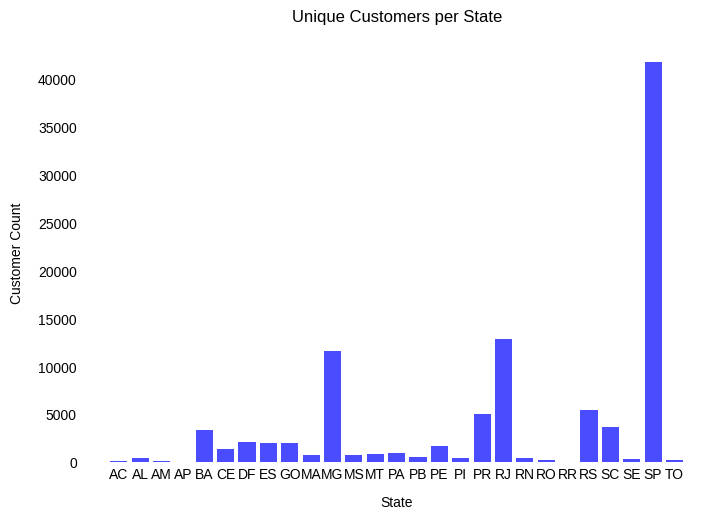

Bar chart created.


In [11]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

ax.bar(customers_per_state['state'], customers_per_state['customer_count'], color='blue', alpha=0.7)

ax.set_xlabel('State', labelpad=10, color='black')
ax.set_ylabel('Customer Count', labelpad=10, color='black')
ax.set_title('Unique Customers per State', pad=15, color='black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.show()
print('Bar chart created.')

**Calculate the number of orders per month in 2018**

In [12]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders_2018 = orders[orders["order_purchase_timestamp"].dt.year == 2018]
orders_per_month = orders_2018.groupby(orders_2018["order_purchase_timestamp"].dt.strftime("%Y-%m"))["order_id"].count().reset_index()
orders_per_month.columns = ["month", "order_count"]
print(orders_per_month)

     month  order_count
0  2018-01         7269
1  2018-02         6728
2  2018-03         7211
3  2018-04         6939
4  2018-05         6873
5  2018-06         6167
6  2018-07         6292
7  2018-08         6512
8  2018-09           16
9  2018-10            4


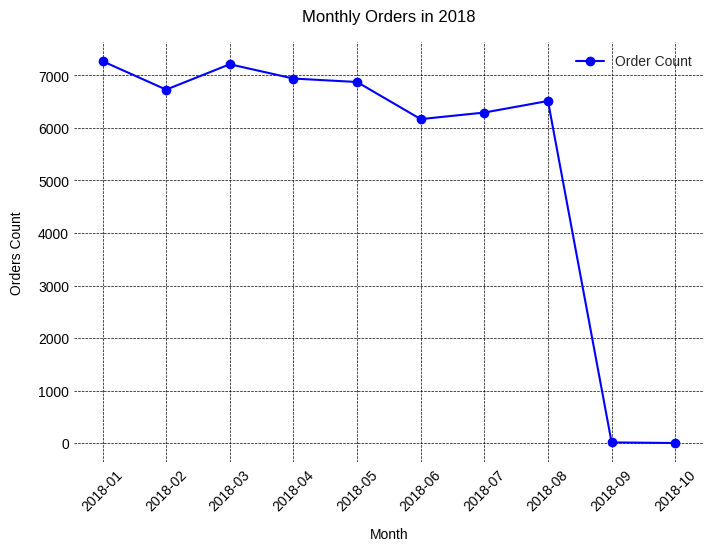

Visualization for orders per month in 2018 created.


In [13]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
ax.plot(orders_per_month['month'], orders_per_month['order_count'], color='blue', marker='o', linestyle='-', label='Order Count')
ax.set_xlabel('Month', labelpad=10, color='black')
ax.set_ylabel('Orders Count', labelpad=10, color='black')
ax.set_title('Monthly Orders in 2018', pad=15, color='black')
ax.tick_params(axis='x', rotation=45, colors='black')
ax.tick_params(axis='y', colors='black')
ax.grid(color='black', linestyle='--', linewidth=0.5)

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.legend(frameon=False, fontsize=10)
plt.show()
print('Visualization for orders per month in 2018 created.')

**Find the average number of products per order grouped by customer city**

In [14]:
customers_orders = customers.merge(orders, on="customer_id")
orders_products = customers_orders.merge(order_items, on="order_id")
products_per_order = orders_products.groupby(["customer_city", "order_id"])["order_id"].count().reset_index(name="product_count")
avg_products_per_city = products_per_order.groupby("customer_city")["product_count"].mean().reset_index()
avg_products_per_city.columns = ["customer_city", "avg_products_per_order"]
print(avg_products_per_city)

            customer_city  avg_products_per_order
0     abadia dos dourados                1.000000
1               abadiania                1.000000
2                  abaete                1.000000
3              abaetetuba                1.272727
4                 abaiara                1.000000
...                   ...                     ...
4105             xinguara                1.111111
4106          xique-xique                1.000000
4107             zacarias                1.000000
4108              ze doca                1.000000
4109               zortea                1.000000

[4110 rows x 2 columns]


**Calculate the Percentage of total revenue contributed by each product category**

In [15]:
merged_df = order_items.merge(products, on="product_id")
sales_per_category = merged_df.groupby("product_category")["price"].sum().reset_index()
total_revenue = sales_per_category["price"].sum()
sales_per_category["percentage_revenue"] = (sales_per_category["price"] / total_revenue) * 100
sales_per_category.columns = ["product_category", "total_sales", "percentage_revenue"]
print(sales_per_category)


             product_category  total_sales  percentage_revenue
0   Agro Industria e Comercio     72530.47            0.540784
1                         Art     24202.64            0.180454
2             Arts and Crafts      1814.01            0.013525
3            Bags Accessories    140429.98            1.047039
4                Blu Ray DVDs      5999.39            0.044731
..                        ...          ...                 ...
68              sport leisure    988048.97            7.366843
69           stationary store    230943.23            1.721901
70            technical books     19096.06            0.142379
71                  telephony    323667.53            2.413249
72                       toys    483946.60            3.608281

[73 rows x 3 columns]


In [16]:
top_20_categories = sales_per_category.sort_values(by="total_sales", ascending=False).head(20)

print("Top 20 Categories by Sales:")
print(top_20_categories)


Top 20 Categories by Sales:
        product_category  total_sales  percentage_revenue
30         HEALTH BEAUTY   1258681.34            9.384664
45       Watches present   1205005.68            8.984461
49        bed table bath   1036988.68            7.731735
68         sport leisure    988048.97            7.366843
53  computer accessories    911954.32            6.799485
24  Furniture Decoration    729762.49            5.441072
13            Cool Stuff    635290.85            4.736696
61            housewares    632248.66            4.714014
47            automotive    592720.11            4.419291
28          Garden tools    485256.46            3.618048
72                  toys    483946.60            3.608281
48                babies    411764.89            3.070098
65             perfumery    399124.87            2.975855
71             telephony    323667.53            2.413249
26      Furniture office    273960.70            2.042637
69      stationary store    230943.23       

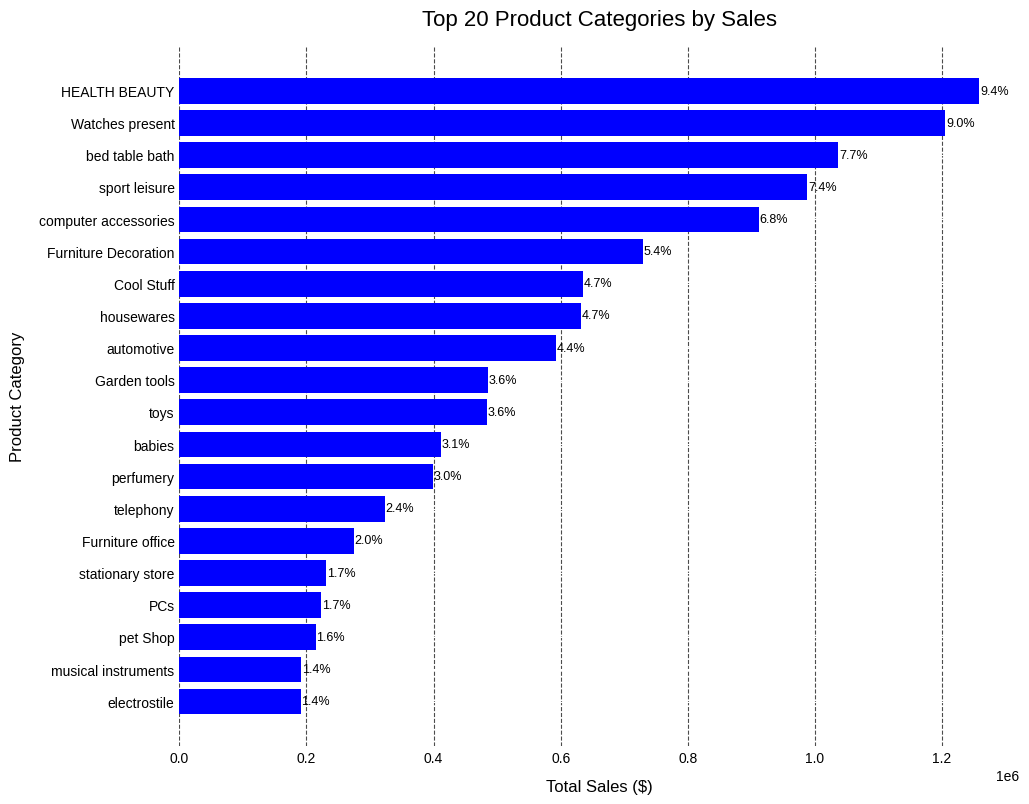

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))

fig.patch.set_facecolor('White')
ax.set_facecolor('White')

bars = ax.barh(
    top_20_categories['product_category'][::-1],
    top_20_categories['total_sales'][::-1],
    color='blue'
)

for bar, percentage in zip(bars, top_20_categories["percentage_revenue"][::-1]):
    ax.text(bar.get_width() + 1000, bar.get_y() + bar.get_height()/2,
            f'{percentage:.1f}%', ha='left', va='center',
            color='Black', fontsize=9)

ax.set_title('Top 20 Product Categories by Sales', color='Black', pad=15, fontsize=16)
ax.set_xlabel('Total Sales ($)', color='Black', labelpad=10, fontsize=12)
ax.set_ylabel('Product Category', color='Black', labelpad=10, fontsize=12)

# Format axes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('Black')
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Add grid lines
ax.grid(axis='x', linestyle='--', alpha=0.7, color='black')
ax.set_axisbelow(True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

# Show plot
plt.show()

**Identify the correlation between product price and the number of times  product has been purchased**

In [18]:
print(order_items.columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


In [19]:
product_purchase_count = order_items.groupby("product_id")["order_id"].count().reset_index(name="purchase_count")
merged_df = product_purchase_count.merge(order_items[["product_id", "price"]].drop_duplicates(), on="product_id")
correlation = merged_df["price"].corr(merged_df["purchase_count"])
print(f"Correlation between product price and purchase count: {correlation:.2f}")

Correlation between product price and purchase count: -0.02


**Calculate the moving average of order value for each customer over their order history**

In [20]:
order_values = order_items.groupby("order_id")["price"].sum().reset_index()
order_values = order_values.rename(columns={"price": "order_value"})

merged_df = orders[["order_id", "customer_id", "order_purchase_timestamp"]].merge(
    order_values, on="order_id"
)

merged_df["order_purchase_timestamp"] = pd.to_datetime(merged_df["order_purchase_timestamp"])

merged_df = merged_df.sort_values(by=["customer_id", "order_purchase_timestamp"])


merged_df["moving_avg_3_orders"] = merged_df.groupby("customer_id")["order_value"].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)


print(merged_df[["customer_id", "order_id", "order_purchase_timestamp", "order_value", "moving_avg_3_orders"]])


                            customer_id                          order_id  \
68055  00012a2ce6f8dcda20d059ce98491703  5f79b5b0931d63f1a42989eb65b9da6e   
9936   000161a058600d5901f007fab4c27140  a44895d095d7e0702b6a162fa2dbeced   
65380  0001fd6190edaaf884bcaf3d49edf079  316a104623542e4d75189bb372bc5f8d   
42834  0002414f95344307404f0ace7a26f1d5  5825ce2e88d5346438686b0bba99e5ee   
5843   000379cdec625522490c315e70c7a9fb  0ab7fb08086d4af9141453c91878ed7a   
...                                 ...                               ...   
34747  fffcb937e9dd47a13f05ecb8290f4d3e  620ddc9fbe3e445676a8e71d4a830821   
15016  fffecc9f79fd8c764f843e9951b11341  814d6a3a7c0b32b2ad929ac6328124e9   
93850  fffeda5b6d849fbd39689bb92087f431  8c855550908247a7eff50281b92167a8   
42907  ffff42319e9b2d713724ae527742af25  83b5fc912b2862c5046555ded1483ae9   
73330  ffffa3172527f765de70084a7e53aae8  d0e7be325a1c986babc4e1cdb91edc03   

      order_purchase_timestamp  order_value  moving_avg_3_orders  
68055   

**Calculate the cumulative sales per month of each year **

In [21]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])

orders["year"] = orders["order_purchase_timestamp"].dt.year
orders["month"] = orders["order_purchase_timestamp"].dt.month

order_sales = order_items.groupby("order_id")["price"].sum().reset_index()
order_sales = order_sales.rename(columns={"price": "order_value"})

merged_df = orders[["order_id", "year", "month"]].merge(order_sales, on="order_id")

monthly_sales = merged_df.groupby(["year", "month"])["order_value"].sum().reset_index()

monthly_sales["cumulative_sales"] = monthly_sales.groupby("year")["order_value"].cumsum()

print(monthly_sales)


    year  month  order_value  cumulative_sales
0   2016      9       267.36            267.36
1   2016     10     49507.66          49775.02
2   2016     12        10.90          49785.92
3   2017      1    120312.87         120312.87
4   2017      2    247303.02         367615.89
5   2017      3    374344.30         741960.19
6   2017      4    359927.23        1101887.42
7   2017      5    506071.14        1607958.56
8   2017      6    433038.60        2040997.16
9   2017      7    498031.48        2539028.64
10  2017      8    573971.68        3113000.32
11  2017      9    624401.69        3737402.01
12  2017     10    664219.43        4401621.44
13  2017     11   1010271.37        5411892.81
14  2017     12    743914.17        6155806.98
15  2018      1    950030.36         950030.36
16  2018      2    844178.71        1794209.07
17  2018      3    983213.44        2777422.51
18  2018      4    996647.75        3774070.26
19  2018      5    996517.68        4770587.94
20  2018     

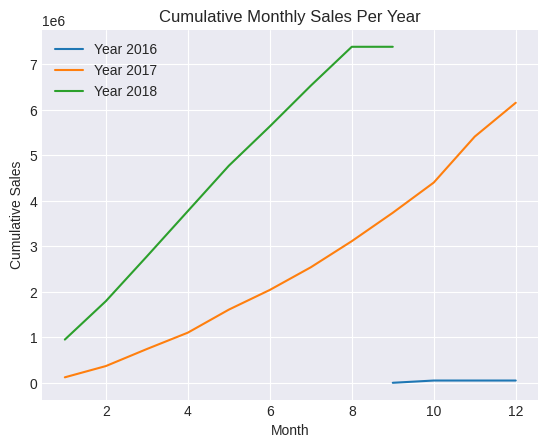

In [22]:
for year in monthly_sales["year"].unique():
    data = monthly_sales[monthly_sales["year"] == year]
    plt.plot(data["month"], data["cumulative_sales"], label=f"Year {year}")

plt.xlabel("Month")
plt.ylabel("Cumulative Sales")
plt.title("Cumulative Monthly Sales Per Year")
plt.legend()
plt.show()

**Calculate the year-over-year growth rate of total sales**

In [23]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["year"] = orders["order_purchase_timestamp"].dt.year
yearly_sales = order_items.merge(orders[["order_id", "year"]], on="order_id")
yearly_sales = yearly_sales.groupby("year")["price"].sum().reset_index()
yearly_sales = yearly_sales.rename(columns={"price": "total_sales"})

yearly_sales["yoy_growth"] = yearly_sales["total_sales"].pct_change() * 100

print(yearly_sales)

   year  total_sales    yoy_growth
0  2016     49785.92           NaN
1  2017   6155806.98  12264.554035
2  2018   7386050.80     19.985094


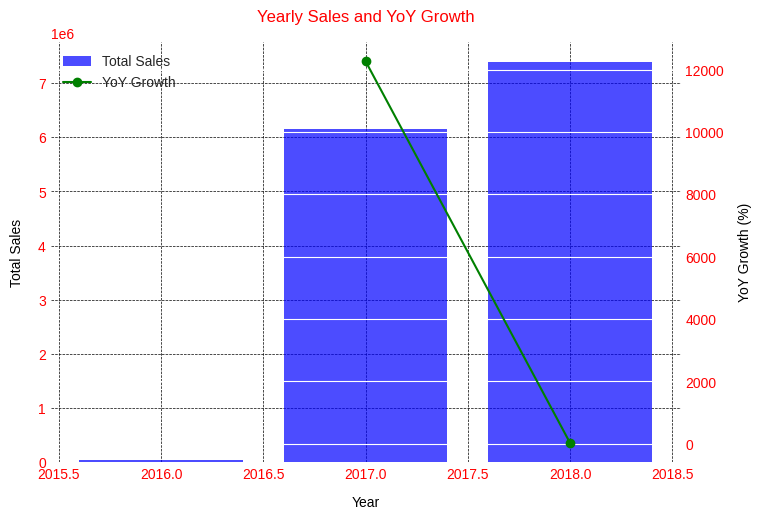

Visualization created and displayed.


In [24]:

yearly_sales['yoy_growth'] = yearly_sales['total_sales'].pct_change() * 100

plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

ax1.bar(yearly_sales['year'], yearly_sales['total_sales'], color='blue', alpha=0.7, label='Total Sales')
ax1.set_xlabel('Year', labelpad=10, color='black')
ax1.set_ylabel('Total Sales', labelpad=10, color='black')
ax1.tick_params(axis='x', colors='red')
ax1.tick_params(axis='y', colors='red')
ax1.set_title('Yearly Sales and YoY Growth', pad=15, color='red')


ax2 = ax1.twinx()
ax2.plot(yearly_sales['year'], yearly_sales['yoy_growth'], color='green', marker='o', label='YoY Growth')
ax2.set_ylabel('YoY Growth (%)', labelpad=10, color='black')
ax2.tick_params(axis='y', colors='red')


ax1.grid(color='black', linestyle='--', linewidth=0.5)
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85), frameon=False, fontsize=10)


fig.patch.set_facecolor('white')
ax1.set_facecolor('white')
ax2.set_facecolor('white')

plt.show()
print('Visualization created and displayed.')

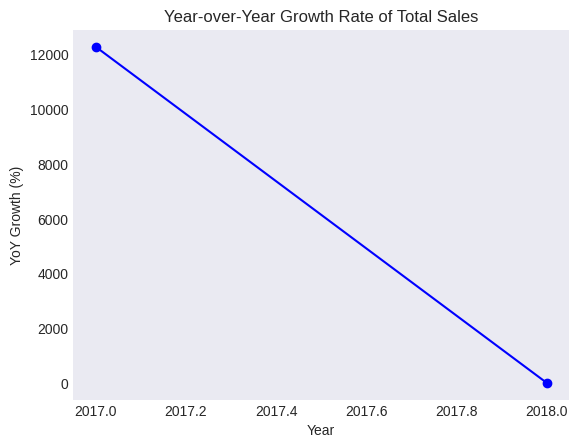

In [25]:

plt.plot(yearly_sales["year"], yearly_sales["yoy_growth"], marker="o", linestyle="-", color="b")
plt.xlabel("Year")
plt.ylabel("YoY Growth (%)")
plt.title("Year-over-Year Growth Rate of Total Sales")
plt.grid()
plt.show()

**Calculate the retention rate of customer,defined as the percentage of customer who make another purchase within 6 months of their first purchase**

In [26]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])

first_purchase = orders.groupby("customer_id")["order_purchase_timestamp"].min().reset_index()
first_purchase = first_purchase.rename(columns={"order_purchase_timestamp": "first_purchase_date"})


orders = orders.merge(first_purchase, on="customer_id")

orders["within_6_months"] = (orders["order_purchase_timestamp"] > orders["first_purchase_date"]) & \
                               (orders["order_purchase_timestamp"] <= orders["first_purchase_date"] + pd.DateOffset(months=6))

repeat_customers = orders.groupby("customer_id")["within_6_months"].any().reset_index()


total_customers = repeat_customers["customer_id"].nunique()
retained_customers = repeat_customers["within_6_months"].sum()
retention_rate = (retained_customers / total_customers) * 100


print(f"Total Customers: {total_customers}")
print(f"Retained Customers: {retained_customers}")
print(f"Customer Retention Rate: {retention_rate:.2f}%")


Total Customers: 99441
Retained Customers: 0
Customer Retention Rate: 0.00%


**Identify the top 3 customer who spent the most money in each year**

In [27]:

orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])

orders["year"] = orders["order_purchase_timestamp"].dt.year

order_sales = order_items.groupby("order_id")["price"].sum().reset_index()
order_sales = order_sales.rename(columns={"price": "total_spent"})

merged_df = orders[["order_id", "customer_id", "year"]].merge(order_sales, on="order_id")

customer_spending = merged_df.groupby(["year", "customer_id"])["total_spent"].sum().reset_index()

customer_spending["rank"] = customer_spending.groupby("year")["total_spent"].rank(method="dense", ascending=False)


top_customers = customer_spending[customer_spending["rank"] <= 3].sort_values(["year", "rank"])

print(top_customers)


       year                       customer_id  total_spent  rank
213    2016  a9dc96b027d1252bbac0a9b72d837fc6      1399.00   1.0
37     2016  1d34ed25963d5aae4cf3d7f3a4cda173      1299.99   2.0
80     2016  4a06381959b6670756de02e07b83815f      1199.00   3.0
4156   2017  1617b1357756262bfa56ab541c47bc16     13440.00   1.0
35059  2017  c6e2731c5b391845f6800c97401a43a9      6735.00   2.0
11418  2017  3fd6777bbce08a352fddd04e4a7cc8f6      6499.00   3.0
94592  2018  ec5b2ba62e574342386871631fafd3fc      7160.00   1.0
96320  2018  f48d464a0baaea338cb25f816991ab1f      6729.00   2.0
92125  2018  e0a2412720e9ea4f26c1ac985f6a7358      4599.90   3.0


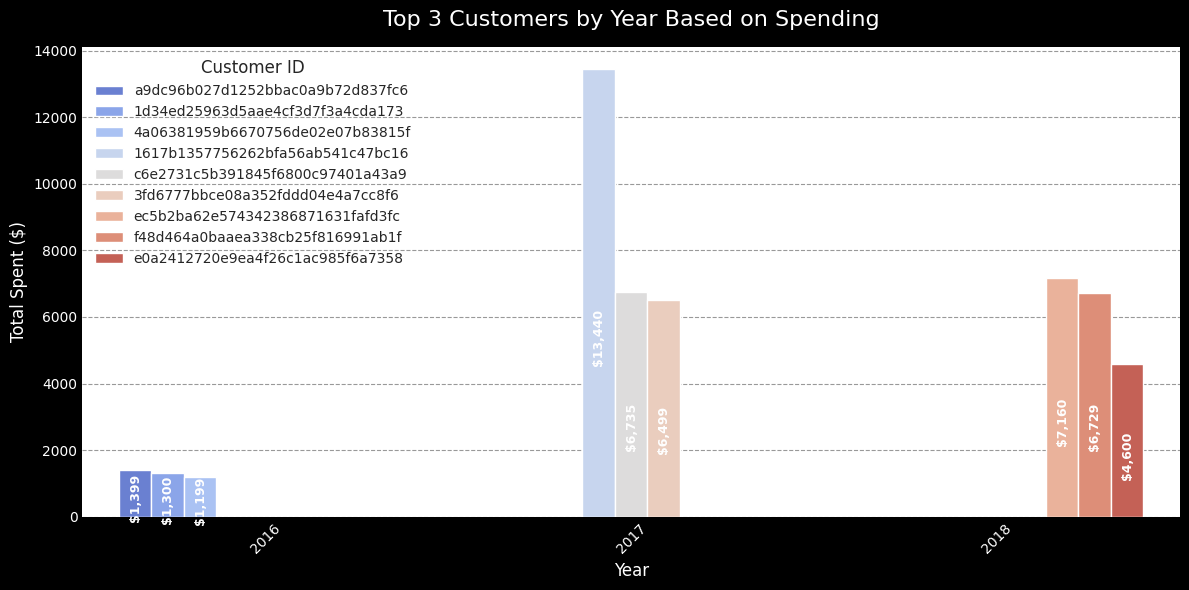

In [38]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(12, 6))

bars = sns.barplot(
    data=top_customers,
    x="year",
    y="total_spent",
    hue="customer_id",
    palette="coolwarm",
    dodge=True
)


for bar in bars.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height * 0.4,
            f"${height:,.0f}",
            ha="center",
            va="center",
            fontsize=9,
            fontweight="bold",
            color="white",
            rotation=90
        )

ax.set_title("Top 3 Customers by Year Based on Spending", fontsize=16, color="white", pad=15)
ax.set_xlabel("Year", fontsize=12, color="white")
ax.set_ylabel("Total Spent ($)", fontsize=12, color="white")
ax.legend(title="Customer ID", title_fontsize="12", fontsize="10", loc="upper left")

fig.patch.set_facecolor("Black")
ax.set_facecolor("white")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("black")
ax.spines["bottom"].set_color("black")
ax.tick_params(axis="x", colors="white")
ax.tick_params(axis="y", colors="white")
ax.yaxis.grid(True, linestyle="--", alpha=0.4, color="black")

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
